# Explore the affect of step size and placement in the dCl/dw numeric derivative

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
# get a set of w values
#myWs = -1*np.array([0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.999,
#          1,
#          1.001,1.01,1.02,1.03,1.04,1.05,1.1,1.2,1.3])
myWs = np.array([-0.95,-0.95,-0.95,-1.0,-1.0,-1.0,-1.05,-1.05,-1.05])

# try with ns
#myNss = np.array([0.95,0.95,0.95,0.96,0.96,0.96,0.97,0.97,0.97])

print myWs
nWs = myWs.size
#print myNss
#nNss = myNss.size

#plt.plot(myWs,marker='o')
#plt.show()

[-0.95 -0.95 -0.95 -1.   -1.   -1.   -1.05 -1.05 -1.05]


In [3]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks = []
for wNum in range(nWs):
    print 'starting MatterPower ',wNum+1,' of ',nWs
    myPks.append( cp.MatterPower(nz=nz,w=myWs[wNum],wa=0.0,nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                neutrino_hierarchy = hier) )
    #myPks.append( cp.MatterPower(nz=nz,w=-1.0,wa=0.0,nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
    #                             neutrino_hierarchy = hier, ns=myNss[wNum]) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

starting MatterPower  1  of  9
neutrino_hierarchy =  normal


zs.size:  299998


time elapsed:  58.8187801838  seconds
time elapsed:  0.980313003063  minutes
time elapsed:  0.0163385500511  hours
starting MatterPower  2  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  116.400730133  seconds
time elapsed:  1.94001216888  minutes
time elapsed:  0.0323335361481  hours
starting MatterPower  3  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  195.481583118  seconds
time elapsed:  3.25802638531  minutes
time elapsed:  0.0543004397551  hours
starting MatterPower  4  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  264.765063047  seconds
time elapsed:  4.41275105079  minutes
time elapsed:  0.0735458508465  hours
starting MatterPower  5  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  329.681097984  seconds
time elapsed:  5.49468496641  minutes
time elapsed:  0.0915780827734  hours
starting MatterPower  6  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  399.704076052  seconds
time elapsed:  6.66173460086  minutes
time elapsed:  0.111028910014  hours
starting MatterPower  7  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  484.658143997  seconds
time elapsed:  8.07763573329  minutes
time elapsed:  0.134627262221  hours
starting MatterPower  8  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  563.132559061  seconds
time elapsed:  9.38554265102  minutes
time elapsed:  0.15642571085  hours
starting MatterPower  9  of  9
neutrino_hierarchy =  normal
zs.size:  299998
time elapsed:  627.498407125  seconds
time elapsed:  10.4583067854  minutes
time elapsed:  0.17430511309  hours
nonlinear =  False
neutrino_hierarchy =  normal


In [4]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWs,nZs,nKs))
for wNum in range(nWs):
    for zNum in range(nZs):
        Pwzk[wNum,zNum] = myPks[wNum].PK.P(zNum,myKs)
print 'done'

done


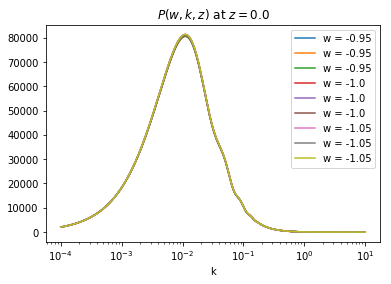

In [5]:
%matplotlib inline

wSet1 = [0,1,2,  9,  16,17,18]
wSet2 = [3,4,5,6,7,  9,  11,12,13,14,15]
wSet3 = [8,9,10]

wSet4 = [0,1,2,3,4,5,6,7,8,9]
wSet5 = [9,10,11,12,13,14,15,16,17,18]

wSet5 = range(nWs)

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet5:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
        #plt.semilogx(myKs,Pwzk[wNum,zNum],label='ns = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    #plt.title(r'$P(ns,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


# Again, with a finer grid of w values based on sigma(w) = 0.007

[-0.986 -0.987 -0.988 -0.989 -0.99  -0.991 -0.992 -0.993 -0.994 -0.995
 -0.996 -0.997 -0.998 -0.999 -1.    -1.001 -1.002 -1.003 -1.004 -1.005
 -1.006 -1.007 -1.008 -1.009 -1.01  -1.011 -1.012 -1.013 -1.014]


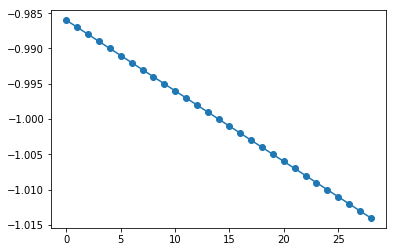

In [6]:
# get a set of w values
%matplotlib inline
myWs = -0.001*(np.arange(29)-14)-1.0
print myWs
nWs = myWs.size
plt.plot(myWs,marker='o')
plt.show()

In [28]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks2 = []
for wNum in range(nWs):
    print 'starting MatterPower ',wNum+1,' of ',nWs
    myPks2.append( cp.MatterPower(nz=nz,w=myWs[wNum],nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                 neutrino_hierarchy = hier) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

starting MatterPower  1  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  67.7195599079  seconds
time elapsed:  1.1286593318  minutes
time elapsed:  0.0188109888633  hours
starting MatterPower  2  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  120.260839939  seconds
time elapsed:  2.00434733232  minutes
time elapsed:  0.033405788872  hours
starting MatterPower  3  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  181.24811697  seconds
time elapsed:  3.0208019495  minutes
time elapsed:  0.0503466991584  hours
starting MatterPower  4  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  233.489025831  seconds
time elapsed:  3.89148376385  minutes
time elapsed:  0.0648580627309  hours
starting MatterPower  5  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  286.272161961  seconds
time elapsed:  4.77120269934  minutes
time elapsed:  0.0795200449891  hours
starting MatterPower  6  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  353.315692902  seconds
time elapsed:  5.88859488169  minutes
time elapsed:  0.0981432480282  hours
starting MatterPower  7  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  419.538275957  seconds
time elapsed:  6.99230459929  minutes
time elapsed:  0.116538409988  hours
starting MatterPower  8  of  29
neutrino_hierarchy =  normal


zs.size:  299998


time elapsed:  483.650837898  seconds
time elapsed:  8.0608472983  minutes
time elapsed:  0.134347454972  hours
starting MatterPower  9  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  542.07337904  seconds
time elapsed:  9.03455631733  minutes
time elapsed:  0.150575938622  hours
starting MatterPower  10  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  603.150887966  seconds
time elapsed:  10.0525147994  minutes
time elapsed:  0.167541913324  hours
starting MatterPower  11  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  663.32977891  seconds
time elapsed:  11.0554963152  minutes
time elapsed:  0.184258271919  hours
starting MatterPower  12  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  722.568444014  seconds
time elapsed:  12.0428074002  minutes
time elapsed:  0.20071345667  hours
starting MatterPower  13  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  778.790678978  seconds
time elapsed:  12.9798446496  minutes
time elapsed:  0.216330744161  hours
starting MatterPower  14  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  833.990144968  seconds
time elapsed:  13.8998357495  minutes
time elapsed:  0.231663929158  hours
starting MatterPower  15  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  884.027825832  seconds
time elapsed:  14.7337970972  minutes
time elapsed:  0.245563284953  hours
starting MatterPower  16  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  938.889997005  seconds
time elapsed:  15.6481666168  minutes
time elapsed:  0.260802776946  hours
starting MatterPower  17  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2102.24943686  seconds
time elapsed:  35.0374906143  minutes
time elapsed:  0.583958176904  hours
starting MatterPower  18  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2154.38235092  seconds
time elapsed:  35.9063725154  minutes
time elapsed:  0.598439541923  hours
starting MatterPower  19  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2201.43035984  seconds
time elapsed:  36.6905059973  minutes
time elapsed:  0.611508433289  hours
starting MatterPower  20  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2249.17589998  seconds
time elapsed:  37.4862649997  minutes
time elapsed:  0.624771083328  hours
starting MatterPower  21  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2298.31869984  seconds
time elapsed:  38.3053116639  minutes
time elapsed:  0.638421861066  hours
starting MatterPower  22  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2355.19885898  seconds
time elapsed:  39.2533143163  minutes
time elapsed:  0.654221905271  hours
starting MatterPower  23  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2406.01107192  seconds
time elapsed:  40.100184532  minutes
time elapsed:  0.668336408867  hours
starting MatterPower  24  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2457.34832692  seconds
time elapsed:  40.9558054487  minutes
time elapsed:  0.682596757478  hours
starting MatterPower  25  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2511.31366682  seconds
time elapsed:  41.8552277803  minutes
time elapsed:  0.697587129672  hours
starting MatterPower  26  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2571.21256995  seconds
time elapsed:  42.8535428325  minutes
time elapsed:  0.714225713876  hours
starting MatterPower  27  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2632.29954982  seconds
time elapsed:  43.8716591636  minutes
time elapsed:  0.731194319394  hours
starting MatterPower  28  of  29
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  2692.43549085  seconds
time elapsed:  44.8739248474  minutes
time elapsed:  0.747898747457  hours
starting MatterPower  29  of  29
neutrino_hierarchy =  normal
zs.size:  299998
time elapsed:  2746.84595084  seconds
time elapsed:  45.7807658474  minutes
time elapsed:  0.763012764123  hours
nonlinear =  False
neutrino_hierarchy =  normal


In [29]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWs,nZs,nKs))
for wNum in range(nWs):
    for zNum in range(nZs):
        Pwzk[wNum,zNum] = myPks2[wNum].PK.P(zNum,myKs)
print 'done'

done


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


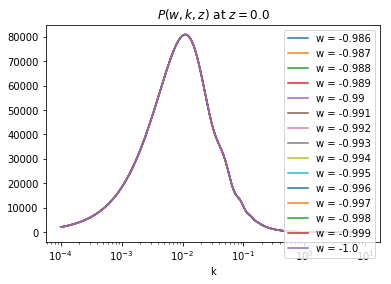

In [9]:
%matplotlib inline

wSet1 = np.arange(15)
wSet2 = np.arange(15)+14
print wSet1
print wSet2

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet1:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


In [10]:
wSet3 = [4,9,14,19,24]
print myWs[wSet3]

[-0.99  -0.995 -1.    -1.005 -1.01 ]


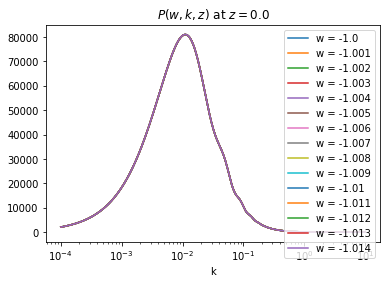

In [11]:
#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet2:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


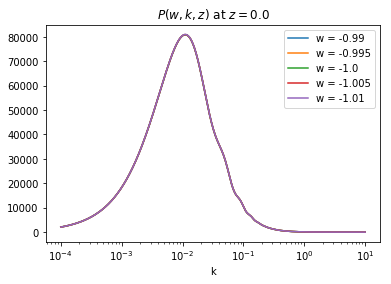

In [12]:
#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet3:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='w = {0}'.format(myWs[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    plt.show()


# Check for convergence of $dC_\ell / dw$ as step size $dw$ changes

In [30]:
print myWs
print nWs
print Pwzk.shape

[-0.986 -0.987 -0.988 -0.989 -0.99  -0.991 -0.992 -0.993 -0.994 -0.995
 -0.996 -0.997 -0.998 -0.999 -1.    -1.001 -1.002 -1.003 -1.004 -1.005
 -1.006 -1.007 -1.008 -1.009 -1.01  -1.011 -1.012 -1.013 -1.014]
29
(29, 5, 500)


In [31]:
nDeltas = (nWs-1)/2
deltaWs = np.empty(nDeltas)
for n in range(nDeltas):
    deltaWs[n] = (myWs[-(n+1)]-myWs[n])/2 # half the distance
print deltaWs

[-0.014 -0.013 -0.012 -0.011 -0.01  -0.009 -0.008 -0.007 -0.006 -0.005
 -0.004 -0.003 -0.002 -0.001]


In [32]:
dPVecs = np.empty((nDeltas,nKs))
for vecNum in range(nDeltas):
    dPVecs[vecNum] = (Pwzk[-(vecNum+1),0,:]-Pwzk[vecNum,0,:])/(2*deltaWs[vecNum])

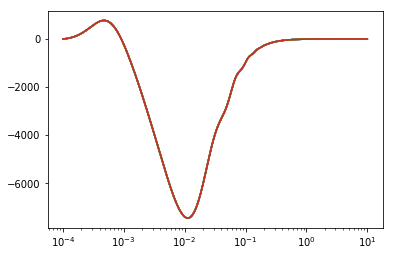

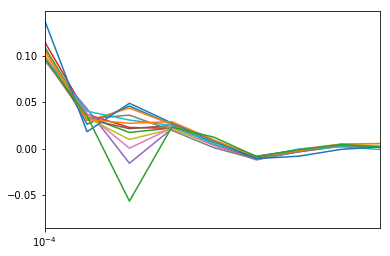

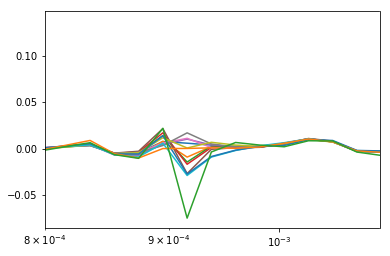

In [45]:
# plot them
% matplotlib inline
for vecNum in range(nDeltas):
    plt.semilogx(myKs,dPVecs[vecNum],label=deltaWs[vecNum])
#plt.legend()
plt.show()

# plot percent differences from smallest delta-w
for vecNum in range(nDeltas-1):
    plt.semilogx(myKs,(dPVecs[vecNum]-dPVecs[-1])/dPVecs[-1],label=deltaWs[vecNum])
    #plt.plot(myKs,(dPVecs[vecNum]-dPVecs[-1])/dPVecs[-1],label=deltaWs[vecNum])
#plt.legend()
plt.xlim((1e-4,1.2e-4))
plt.show()

for vecNum in range(nDeltas-1):
    plt.semilogx(myKs,(dPVecs[vecNum]-dPVecs[-1])/dPVecs[-1],label=deltaWs[vecNum])
    #plt.plot(myKs,(dPVecs[vecNum]-dPVecs[-1])/dPVecs[-1],label=deltaWs[vecNum])
#plt.legend()
plt.xlim((8e-4,1.1e-3))
plt.show()


# Do testing to see if w0, wa is working in CAMB and pycamb

In [13]:
import camb
help(camb.model.CAMBparams.set_dark_energy)
reload(cp)

Help on method set_dark_energy in module camb.model:

set_dark_energy(self, w=-1.0, wa=0.0, sound_speed=1.0, dark_energy_model='fluid') unbound camb.model.CAMBparams method
    Set dark energy parameters. Not that in this version these are not actually stored in
    the CAMBparams variable but set globally. So be careful!
    
    :param w: w0 part of p_de/rho_de
    
    :param wa: wa part of p_de/rho_de in w = w0 + wa*( 1-a )
    
    :param sound_speed: rest-frame sound speed of dark energy fluid
    :param dark_energy_model: model to use, default is 'fluid'
    :return: self



<module 'crosspower' from 'crosspower.pyc'>

In [14]:
# get a set of wa values
#myWas = np.array([-0.050,-0.025,0.000,0.025,0.050]) #version A
#myWas = np.array([0.050,0.025,0.000,-0.025,-0.050]) #version B

#myWas = np.array([-0.2,-0.1,0.0,0.1,0.2]) #version C
#myWas = np.array([0.2,0.1,0.0,-0.1,-0.2]) #version D

#myWas = np.array([-0.1,-0.1,-0.1,-0.1,-0.1]) #version E
#myWas = np.array([0,0,0,0,0]) #version F

myWas = np.array([-0.025,-0.025,-0.025,0.000,0.000,0.000,0.025,0.025,0.025]) #version AA
#myWas = np.array([0.050,0.050,0.025,0.025,0.000,0.000,-0.025,-0.025,-0.050,-0.050]) #version BB

print myWas
nWas = myWas.size
#plt.plot(myWas,marker='o')
#plt.show()

[-0.025 -0.025 -0.025  0.     0.     0.     0.025  0.025  0.025]


In [15]:
import time
#hier = 'degenerate'
hier = 'normal'
#nz = 10000
nz = 300000
#nonlinear = True
nonlinear = False
AccuracyBoost = 3

starttime = time.time()
myPks = []
for waNum in range(nWas):
    print 'starting MatterPower ',waNum+1,' of ',nWas
    reload(cp)
    myPks.append( cp.MatterPower(nz=nz,w=-1,wa=myWas[waNum],nonlinear=nonlinear,AccuracyBoost=AccuracyBoost,
                                 neutrino_hierarchy = hier) )

    endtime = time.time()

    print 'time elapsed: ', endtime-starttime, ' seconds'
    print 'time elapsed: ', (endtime-starttime)/60., ' minutes'
    print 'time elapsed: ', (endtime-starttime)/3600., ' hours'

print 'nonlinear = ',nonlinear
print 'neutrino_hierarchy = ',hier

starting MatterPower  1  of  9
neutrino_hierarchy =  normal


zs.size:  299998


time elapsed:  51.0378499031  seconds
time elapsed:  0.850630831718  minutes
time elapsed:  0.0141771805286  hours
starting MatterPower  2  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  120.900362015  seconds
time elapsed:  2.01500603358  minutes
time elapsed:  0.033583433893  hours
starting MatterPower  3  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  188.722541809  seconds
time elapsed:  3.14537569682  minutes
time elapsed:  0.0524229282803  hours
starting MatterPower  4  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  240.329668999  seconds
time elapsed:  4.00549448331  minutes
time elapsed:  0.0667582413885  hours
starting MatterPower  5  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  286.054605961  seconds
time elapsed:  4.76757676601  minutes
time elapsed:  0.0794596127669  hours
starting MatterPower  6  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  332.213325977  seconds
time elapsed:  5.53688876629  minutes
time elapsed:  0.0922814794381  hours
starting MatterPower  7  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  383.402365923  seconds
time elapsed:  6.39003943205  minutes
time elapsed:  0.106500657201  hours
starting MatterPower  8  of  9
neutrino_hierarchy =  normal
zs.size:  299998


time elapsed:  434.511651039  seconds
time elapsed:  7.24186085065  minutes
time elapsed:  0.120697680844  hours
starting MatterPower  9  of  9
neutrino_hierarchy =  normal
zs.size:  299998
time elapsed:  485.542335987  seconds
time elapsed:  8.09237226645  minutes
time elapsed:  0.134872871108  hours
nonlinear =  False
neutrino_hierarchy =  normal


In [16]:
# get some k values to use
nKs = 500
myKs = np.logspace(-4,1,nKs)

# get some z values
nZs = 5
myZs = [0.0,0.5,1.0,2.0,8.0]

# evaluate P(w,z,k)
Pwzk = np.empty((nWas,nZs,nKs))
for waNum in range(nWas):
    for zNum in range(nZs):
        Pwzk[waNum,zNum] = myPks[waNum].PK.P(zNum,myKs)
print 'done'

done


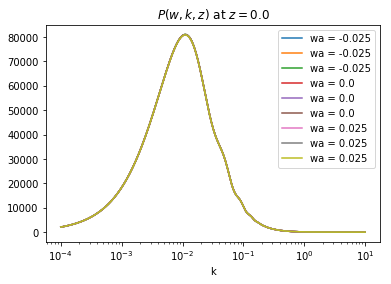

In [17]:
%matplotlib inline

wSet5 = range(nWas)

#for zNum in range(nZs):
for zNum in range(1):
    for wNum in wSet5:
        plt.semilogx(myKs,Pwzk[wNum,zNum],label='wa = {0}'.format(myWas[wNum]))
    plt.title(r'$P(w,k,z)$ at $z = {0}$'.format(myZs[zNum]))
    plt.legend()
    plt.xlabel('k')
    #plt.ylim([75000,82000])
    plt.show()


In [18]:
#Pwzk_m01 = Pwzk.copy() # 5 times: wa=-0.1
#Pwzk_p00 = Pwzk.copy() # 5 times: wa=0

In [19]:
# calculate a few derivatives
#dB02 = (Pwzk[0]-Pwzk[2])/0.05
#dA02 = (Pwzk[4]-Pwzk[2])/0.05

#dB13 = (Pwzk[1]-Pwzk[3])/0.05
#dA13 = (Pwzk[3]-Pwzk[1])/0.05

#dB42 = (Pwzk[2]-Pwzk[4])/0.05
#dA42 = (Pwzk[2]-Pwzk[0])/0.05

#dD02 = (Pwzk[0]-Pwzk[2])/0.2
#dC02 = (Pwzk[4]-Pwzk[2])/0.2

#dD13 = (Pwzk[1]-Pwzk[3])/0.2
#dC13 = (Pwzk[3]-Pwzk[1])/0.2

#dD42 = (Pwzk[2]-Pwzk[4])/0.2
#dC42 = (Pwzk[2]-Pwzk[0])/0.2


In [20]:
%matplotlib inline

plt.semilogx(myKs,dA02[0],label='02')
plt.semilogx(myKs,dA13[0],label='13')
plt.semilogx(myKs,dA42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version A')
plt.legend()
plt.show()

plt.semilogx(myKs,dB02[0],label='02')
plt.semilogx(myKs,dB13[0],label='13')
plt.semilogx(myKs,dB42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version B')
plt.legend()
plt.show()

plt.semilogx(myKs,dC02[0],label='02')
plt.semilogx(myKs,dC13[0],label='13')
plt.semilogx(myKs,dC42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version C')
plt.legend()
plt.show()

plt.semilogx(myKs,dD02[0],label='02')
plt.semilogx(myKs,dD13[0],label='13')
plt.semilogx(myKs,dD42[0],label='42')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('version D')
plt.legend()
plt.show()


NameError: name 'dA02' is not defined

In [ ]:
plt.semilogx(myKs,dA02[0],label='02 A')
plt.semilogx(myKs,dA13[0],label='13 A')

plt.semilogx(myKs,dB13[0],label='13 B')
plt.semilogx(myKs,dB42[0],label='42 B')

plt.semilogx(myKs,dC02[0],label='02 C')
plt.semilogx(myKs,dC13[0],label='13 C')

plt.semilogx(myKs,dD13[0],label='13 D')
plt.semilogx(myKs,dD42[0],label='42 D')


plt.xlabel(r'k [Mpc$^{-1}$]')
plt.title('versions A, B')
plt.legend()
plt.show()